# **Economic & Geographical Analysis of India using Census 2011 data and more**

## About Census:
<i>Census (from Latin censere, 'to assess') is the procedure of systematically acquiring, recording, and calculating population information about the members of a given population, usually displayed in the form of statistics. A census counts the <b>population</b> of a nation, state, or other geographic region. It records information about the population’s characteristics, such as age, sex, and occupation.</i>

### Census in India :

<i> The Indian Census is the largest single source of various statistical information on various characteristics of the people of India. With a history of more than 130 years, this reliable, time-tested exercise is bringing in a real insight into the data every 10 years, beginning in the year 1872 when the first census was conducted non-synchronously in different parts of India.The Indian Census has been an attractive source of data for scholars and researchers in demography, economics, anthropology, sociology, statistics and many other disciplines. The rich diversity of India's people is indeed revealed by the decadal census, which has become a tool for understanding and studying India. </i>

  <li>The decennial census of India has been conducted 15 times, as of 2011.</li>
  <li>While it has been undertaken every 10 years, beginning in 1872 under Viceroy Lord Mayo, the first complete census was taken in 1872.</li>

#### Census India 2011: 

   <li>The 15th Indian census was conduted in 2011 known as the <b>2011 census of India</b>. </li>
   <li>Spread across 28 states and 8 union territories, the census covered 640 districts, 5,924 sub-districts, 7,935 towns and        more than 600,000 villages.</li>

   
#### We will try to analyse the data using Python libraries and draw insights from the analysis.
    
     Lets get started..



<i>Let’s import all of the modules, functions and objects we are going to use </i>

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)   #for full width output display
import matplotlib.colors as mcolors
import matplotlib .pyplot as plt
import numpy as np
import geopandas as gpd                       # for plotting map
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.colors import LogNorm         #for normalisation in color maps

<b>LOADING THE DATA</b>

<li>Firstly, we load the dataset using pandas in a dataframe named 'data'. </li>
<li>You can download and place this file in your working directory to avoid this format of file path.</li>
<li>If you place the file elsewhere then you can use this syntax to import the file or include <i>(r"file path")</i>
before the file path.</li>

In [4]:
data=pd.read_csv("C:\\Users\\lenovo\\Downloads\\india-districts-census-2011.csv")

<b>Getting the dimensions of the dataset</b>
<li>To get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property</li>

In [5]:
data.shape

(640, 118)

<i>Shape of the dataset showcases exactly what we discussed earlier...</i><br>
<li>Census of 2011 was conducted across 640 districts which is depicted by number of rows in the dataset.<br></li>
<li>Survey is conducted across all districts along 118 unique attributes, as we get number of columns.</li>


<b>Getting some more informationa about the data set</b> <br>

Using the info property on the data frame

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


<b>Checking for any missing value in the data and summing it up</b>

In [13]:
data.isnull().sum().sum() 

0

<li><i>data.isnull()</i> - shows all data fields with true/false values in tabular format, True if data field has missing value, False, if no missing value.</li>
<li><i>data.isnull().sum()</i> - shows columns with sum of missing data fields across the data frame if any else shows a value 0, showing no missing value.</li>
<li><i>data.isnull().sum().sum()</i> - shows just the total sum of missing data fields in the data frame, 0 value shows no empty data field.</li>

<b>Lets have a look at our data set using <i>head</i> property <br>
<li>It automatically displays 5 rows when not mentioned explicitly in the head function.</li>

In [36]:
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


<li>So data has many rows and columns, rows showing state names and the associated districts.</li>
<li>Data shows population across each district, number of males and females across each district etc.</li>

<b>Fetching statistical summary of data set using <i>describe</i> property.</b><br>
<li>It shows count,mean,standard deviation,minimum, maximum etc. of the columns.</li>

In [37]:
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


<b>Getting a list of all columns to have a bigger picture...</b>

In [14]:
data.columns
list(data.columns)
#print(list(data.columns))

['District code',
 'State name',
 'District name',
 'Population',
 'Male',
 'Female',
 'Literate',
 'Male_Literate',
 'Female_Literate',
 'SC',
 'Male_SC',
 'Female_SC',
 'ST',
 'Male_ST',
 'Female_ST',
 'Workers',
 'Male_Workers',
 'Female_Workers',
 'Main_Workers',
 'Marginal_Workers',
 'Non_Workers',
 'Cultivator_Workers',
 'Agricultural_Workers',
 'Household_Workers',
 'Other_Workers',
 'Hindus',
 'Muslims',
 'Christians',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',
 'Religion_Not_Stated',
 'LPG_or_PNG_Households',
 'Housholds_with_Electric_Lighting',
 'Households_with_Internet',
 'Households_with_Computer',
 'Rural_Households',
 'Urban_Households',
 'Households',
 'Below_Primary_Education',
 'Primary_Education',
 'Middle_Education',
 'Secondary_Education',
 'Higher_Education',
 'Graduate_Education',
 'Other_Education',
 'Literate_Education',
 'Illiterate_Education',
 'Total_Education',
 'Age_Group_0_29',
 'Age_Group_30_49',
 'Age_Group_50',
 'Age not stated',
 'Househol

### Data Manipulation
<b>Lets play with data to fetch out our desired results

In [15]:
gender = data.groupby("State name")[["Population","Male","Female"]].sum() #.reset_index() #add this if you want index other than state name
print(gender)

                             Population       Male    Female
State name                                                  
ANDAMAN AND NICOBAR ISLANDS      380581     202871    177710
ANDHRA PRADESH                 84580777   42442146  42138631
ARUNACHAL PRADESH               1383727     713912    669815
ASSAM                          31205576   15939443  15266133
BIHAR                         104099452   54278157  49821295
CHANDIGARH                      1055450     580663    474787
CHHATTISGARH                   25545198   12832895  12712303
DADRA AND NAGAR HAVELI           343709     193760    149949
DAMAN AND DIU                    243247     150301     92946
GOA                             1458545     739140    719405
GUJARAT                        60439692   31491260  28948432
HARYANA                        25351462   13494734  11856728
HIMACHAL PRADESH                6864602    3481873   3382729
JAMMU AND KASHMIR              12541302    6640662   5900640
JHARKHAND               

In [40]:
#krb=data[(data['State name']=='CHHATTISGARH') & (data['District name']=='Korba')]
#print(krb)
#data['State name'].unique().tolist()
KOR=data.loc[data['District name']=='Korba']
print(KOR)

     District code    State name District name  Population    Male  Female  \
403            404  CHHATTISGARH         Korba     1206640  612915  593725   

     Literate  Male_Literate  Female_Literate      SC  ...  \
403    748759         433391           315368  124679  ...   

     Power_Parity_Rs_90000_150000  Power_Parity_Rs_45000_150000  \
403                           416                           937   

     Power_Parity_Rs_150000_240000  Power_Parity_Rs_240000_330000  \
403                            101                             63   

     Power_Parity_Rs_150000_330000  Power_Parity_Rs_330000_425000  \
403                            164                             54   

     Power_Parity_Rs_425000_545000  Power_Parity_Rs_330000_545000  \
403                             88                            142   

     Power_Parity_Above_Rs_545000  Total_Power_Parity  
403                            75                1565  

[1 rows x 118 columns]


In [41]:
data.loc[403]

District code                             404
State name                       CHHATTISGARH
District name                           Korba
Population                            1206640
Male                                   612915
                                     ...     
Power_Parity_Rs_330000_425000              54
Power_Parity_Rs_425000_545000              88
Power_Parity_Rs_330000_545000             142
Power_Parity_Above_Rs_545000               75
Total_Power_Parity                       1565
Name: 403, Length: 118, dtype: object

In [44]:
krb=data[(data['State name']=='CHHATTISGARH') & (data['District name']=='Korba')]

krb.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [45]:
fml=data[['District name','Female']]
fml=fml.sort_values(by='Female', ascending=False)
fml

,District name,Female
516,Thane,5195070
336,North Twenty Four Parganas,4890392
571,Bangalore,4598890
520,Pune,4505303
517,Mumbai Suburban,4325639
...,...,...
251,Upper Siang,16621
637,Nicobars,16115
24,Lahul AND Spiti,14976
259,Anjaw,9660


In [46]:
state_summary = data.groupby("State name")[["Population", "Literate","Agricultural_Workers"]].sum()
print(state_summary)


                             Population   Literate  Agricultural_Workers
State name                                                              
ANDAMAN AND NICOBAR ISLANDS      380581     294281                  4781
ANDHRA PRADESH                 84580777   50556760              16967754
ARUNACHAL PRADESH               1383727     766005                 36171
ASSAM                          31205576   19177977               1845346
BIHAR                         104099452   52504553              18345649
CHANDIGARH                      1055450     805438                  1687
CHHATTISGARH                   25545198   15379922               5091882
DADRA AND NAGAR HAVELI           343709     223230                 17799
DAMAN AND DIU                    243247     188406                   772
GOA                             1458545    1165487                 26760
GUJARAT                        60439692   41093358               6839415
HARYANA                        25351462   16598988 

In [47]:
state_summary["Literacy Rate"] = (state_summary["Literate"] / state_summary["Population"]) * 100
print(state_summary)

                             Population   Literate  Agricultural_Workers  \
State name                                                                 
ANDAMAN AND NICOBAR ISLANDS      380581     294281                  4781   
ANDHRA PRADESH                 84580777   50556760              16967754   
ARUNACHAL PRADESH               1383727     766005                 36171   
ASSAM                          31205576   19177977               1845346   
BIHAR                         104099452   52504553              18345649   
CHANDIGARH                      1055450     805438                  1687   
CHHATTISGARH                   25545198   15379922               5091882   
DADRA AND NAGAR HAVELI           343709     223230                 17799   
DAMAN AND DIU                    243247     188406                   772   
GOA                             1458545    1165487                 26760   
GUJARAT                        60439692   41093358               6839415   
HARYANA     

In [48]:
state_summary=state_summary.sort_values('Population',ascending=False)
print(state_summary)

                             Population   Literate  Agricultural_Workers  \
State name                                                                 
UTTAR PRADESH                 199812341  114397555              19939223   
MAHARASHTRA                   112374333   81554290              13486140   
BIHAR                         104099452   52504553              18345649   
WEST BENGAL                    91276115   61538281              10188842   
ANDHRA PRADESH                 84580777   50556760              16967754   
MADHYA PRADESH                 72626809   42851169              12192267   
TAMIL NADU                     72147030   51837507               9606547   
RAJASTHAN                      68548437   38275282               4939664   
KARNATAKA                      61095297   40647322               7155963   
GUJARAT                        60439692   41093358               6839415   
ORISSA                         41974218   26742595               6739993   
KERALA      

In [49]:
#print(state_summary)
state_summary.head()


,Population,Literate,Agricultural_Workers,Literacy Rate
State name,,,,
UTTAR PRADESH,199812341,114397555,19939223,57.252497
MAHARASHTRA,112374333,81554290,13486140,72.573770
BIHAR,104099452,52504553,18345649,50.436916
WEST BENGAL,91276115,61538281,10188842,67.419917
ANDHRA PRADESH,84580777,50556760,16967754,59.773345


In [50]:
state_summary['Agricultural_Workers']

State name
UTTAR PRADESH                  19939223
MAHARASHTRA                    13486140
BIHAR                          18345649
WEST BENGAL                    10188842
ANDHRA PRADESH                 16967754
MADHYA PRADESH                 12192267
TAMIL NADU                      9606547
RAJASTHAN                       4939664
KARNATAKA                       7155963
GUJARAT                         6839415
ORISSA                          6739993
KERALA                          1322850
JHARKHAND                       4436052
ASSAM                           1845346
PUNJAB                          1588455
CHHATTISGARH                    5091882
HARYANA                         1528133
NCT OF DELHI                      39475
JAMMU AND KASHMIR                547705
UTTARAKHAND                      403301
HIMACHAL PRADESH                 175038
TRIPURA                          353618
MEGHALAYA                        198364
MANIPUR                          134077
NAGALAND                     

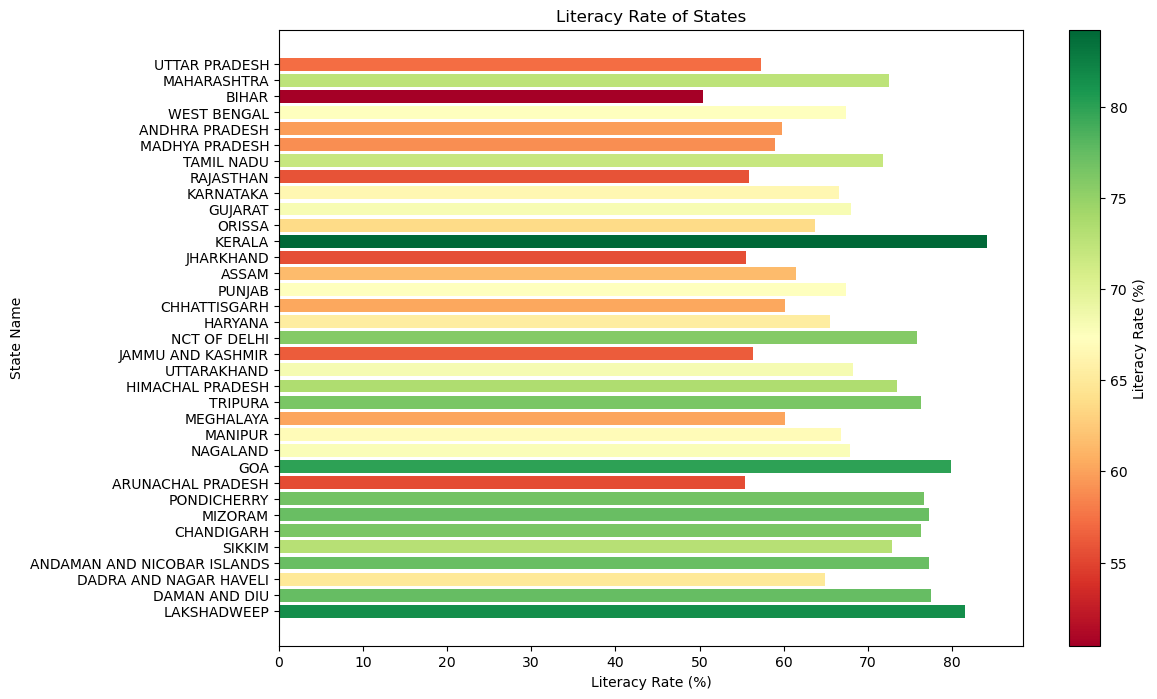

In [51]:
# Set up the color map for the literacy rate
norm = mcolors.Normalize(vmin=state_summary["Literacy Rate"].min(), vmax=state_summary["Literacy Rate"].max())
cmap = plt.get_cmap("RdYlGn")  # Red to Green color map

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot literacy rate for each state
bars = ax.barh(state_summary.index, state_summary["Literacy Rate"], color=cmap(norm(state_summary["Literacy Rate"])))

# Add labels and title
ax.set_xlabel("Literacy Rate (%)")
ax.set_ylabel("State Name")
ax.set_title("Literacy Rate of States")

# Create color bar with ScalarMappable and set it in the figure
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for color mapping
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", label="Literacy Rate (%)")

# Invert y-axis for better readability
ax.invert_yaxis()
plt.show()

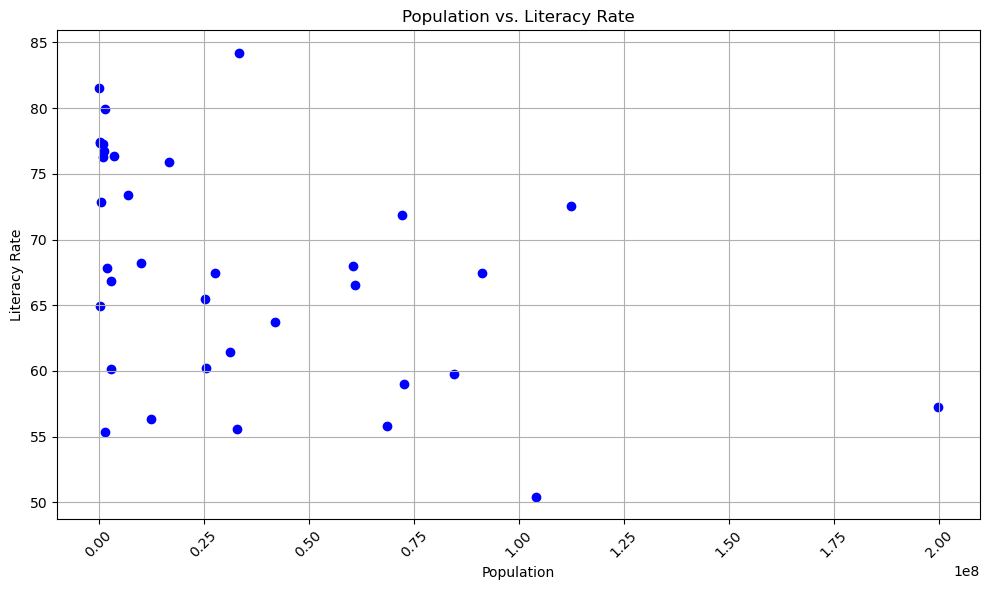

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(state_summary['Population'], state_summary['Literacy Rate'], marker='o', color='b')

# Set labels and title
plt.xlabel("Population")
plt.ylabel("Literacy Rate")
plt.title("Population vs. Literacy Rate")

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

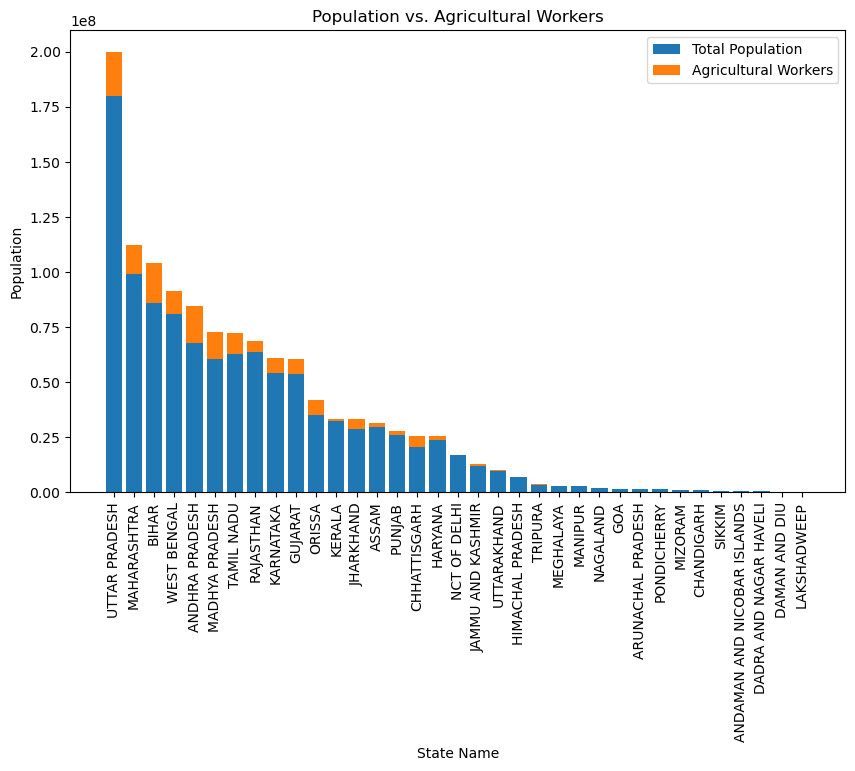

In [53]:
# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(state_summary.index, state_summary['Population'], label='Total Population')
ax.bar(state_summary.index, state_summary['Agricultural_Workers'], bottom=state_summary['Population'] - state_summary['Agricultural_Workers'], label='Agricultural Workers')

# Set labels and title
ax.set_xlabel('State Name')
ax.set_ylabel('Population')
ax.set_title('Population vs. Agricultural Workers')

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Add legend
plt.legend()


In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(state_summary)

# Calculate pairwise Euclidean distances
distance_matrix = squareform(pdist(normalized_data, metric='euclidean'))

# Convert distance matrix to a DataFrame for easy inspection
distance_df = pd.DataFrame(distance_matrix, index=state_summary.index, columns=state_summary.index)

# Find the minimum non-zero distance
min_distance = float('inf')
closest_pair = (None, None)

for i in range(len(state_summary.index)):
    for j in range(i + 1, len(state_summary.index)):
        if distance_matrix[i][j] < min_distance:
            min_distance = distance_matrix[i][j]
            closest_pair = (state_summary.index[i], state_summary.index[j])

print("Closest pair of states:", closest_pair)
print("Euclidean Distance between them:", min_distance)


Closest pair of states: ('ANDAMAN AND NICOBAR ISLANDS', 'DAMAN AND DIU')
Euclidean Distance between them: 0.016007933650364712


Population              380581.000000
Literate                294281.000000
Agricultural_Workers      4781.000000
Literacy Rate               77.324144
Name: ANDAMAN AND NICOBAR ISLANDS, dtype: float64
Population              243247.000000
Literate                188406.000000
Agricultural_Workers       772.000000
Literacy Rate               77.454604
Name: DAMAN AND DIU, dtype: float64


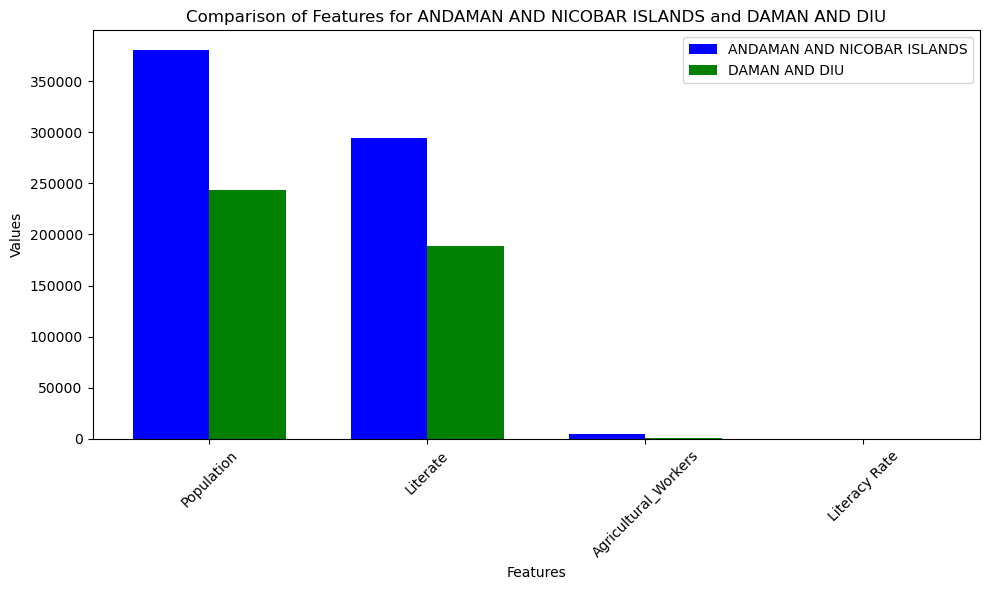

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'closest_pair' contains the names of the two most similar states
state1, state2 = closest_pair

# Extract data for the two states
state1_data = state_summary.loc[state1]
print(state1_data)
state2_data = state_summary.loc[state2]
print(state2_data)
# Number of features
num_features = len(state_summary.columns)

# Define positions for the bars on the x-axis
index = np.arange(num_features)
bar_width = 0.35

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Plot bars for each state
plt.bar(index, state1_data, bar_width, label=state1, color='b')
plt.bar(index + bar_width, state2_data, bar_width, label=state2, color='g')

# Adding labels and title
plt.xlabel("Features")
plt.ylabel("Values")
plt.title(f"Comparison of Features for {state1} and {state2}")
plt.xticks(index + bar_width / 2, state_summary.columns, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [56]:
agri_data = state_summary.set_index(state_summary.index).to_dict()['Agricultural_Workers']
print(agri_data)

{'UTTAR PRADESH': 19939223, 'MAHARASHTRA': 13486140, 'BIHAR': 18345649, 'WEST BENGAL': 10188842, 'ANDHRA PRADESH': 16967754, 'MADHYA PRADESH': 12192267, 'TAMIL NADU': 9606547, 'RAJASTHAN': 4939664, 'KARNATAKA': 7155963, 'GUJARAT': 6839415, 'ORISSA': 6739993, 'KERALA': 1322850, 'JHARKHAND': 4436052, 'ASSAM': 1845346, 'PUNJAB': 1588455, 'CHHATTISGARH': 5091882, 'HARYANA': 1528133, 'NCT OF DELHI': 39475, 'JAMMU AND KASHMIR': 547705, 'UTTARAKHAND': 403301, 'HIMACHAL PRADESH': 175038, 'TRIPURA': 353618, 'MEGHALAYA': 198364, 'MANIPUR': 134077, 'NAGALAND': 62962, 'GOA': 26760, 'ARUNACHAL PRADESH': 36171, 'PONDICHERRY': 68391, 'MIZORAM': 41787, 'CHANDIGARH': 1687, 'SIKKIM': 25986, 'ANDAMAN AND NICOBAR ISLANDS': 4781, 'DADRA AND NAGAR HAVELI': 17799, 'DAMAN AND DIU': 772, 'LAKSHADWEEP': 0}


In [57]:
ppd=pd.read_csv('Table_2A_State_Uts.csv')
ppd.head()

,Category,India/State/Union Territory,Population 2011,Decadal Population Growth Rate - 2001-2011,Population Density (per sq.km) - 2011
0,India,India,1210854977,17.7,368
1,State,Andhra Pradesh,49386799,9.0,308
2,State,Arunachal Pradesh,1383727,26.0,17
3,State,Assam,31205576,17.1,398
4,State,Bihar,104099452,25.4,1106


In [58]:
pop_den=ppd.drop(0)

pop_den_data=pop_den.set_index('India/State/Union Territory').to_dict()['Population Density (per sq.km) - 2011']
print(pop_den_data)

{'Andhra Pradesh': 308, 'Arunachal Pradesh': 17, 'Assam': 398, 'Bihar': 1106, 'Chhattisgarh': 189, 'Goa': 394, 'Gujarat': 308, 'Haryana': 573, 'Himachal Pradesh': 123, 'Jammu & Kashmir': 56, 'Jharkhand': 414, 'Karnataka': 319, 'Kerala': 860, 'Madhya Pradesh': 236, 'Maharashtra': 365, 'Manipur': 128, 'Meghalaya': 132, 'Mizoram': 52, 'Nagaland': 119, 'Odisha': 270, 'Punjab': 551, 'Rajasthan': 200, 'Sikkim': 86, 'Tamil Nadu': 555, 'Telangana': 306, 'Tripura': 350, 'Uttarakhand': 189, 'Uttar Pradesh': 829, 'West Bengal': 1028, 'Andaman & Nicobar Island': 46, 'Chandigarh': 9258, 'Dadra & Nagar Haveli': 700, 'Daman & Diu': 2191, 'Delhi': 11320, 'Lakshadweep': 2149, 'Puducherry': 2547}


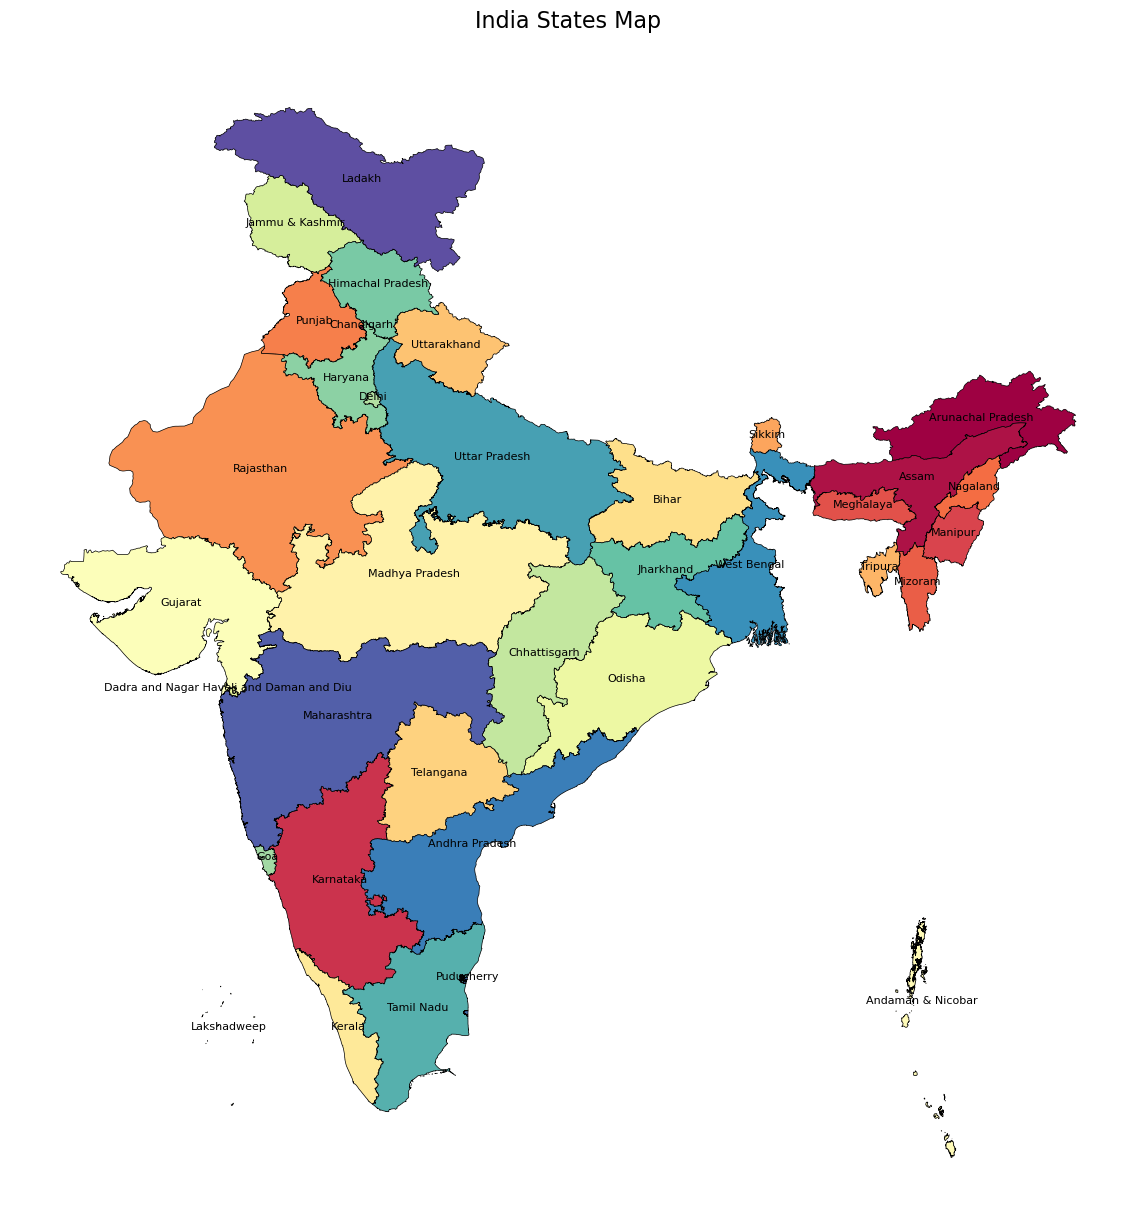

In [59]:
def create_state_level_map():
    """
    Create a visualization of India with state-level details
    """
    # Read the state-level shapefile
    states = gpd.read_file('Admin2.shp')
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    
    # Generate colors for states
    colors = plt.cm.Spectral(np.linspace(0, 1, len(states)))
    
    # Plot the states
    states.plot(ax=ax, color=colors, edgecolor='black', linewidth=0.5)
    
    # Customize the plot
    ax.set_title('India States Map', fontsize=16, pad=20)
    ax.axis('off')
    
    # Add state labels
    for idx, row in states.iterrows():
        ax.annotate(text=row['ST_NM'],
                   xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                   horizontalalignment='center',
                   fontsize=8)
    
    return fig, ax

# Create and display the map
fig, ax = create_state_level_map()
plt.show()

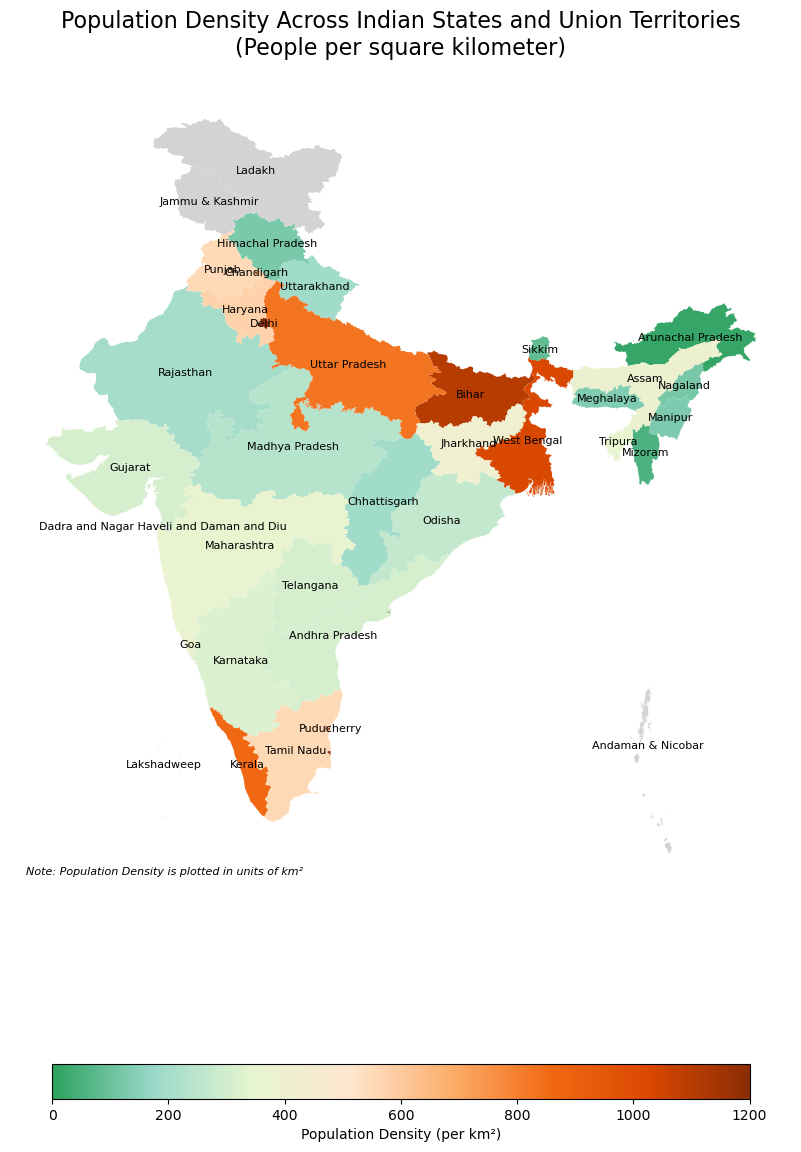

In [60]:

from matplotlib.colors import Normalize

def create_enhanced_density_map():
    """
    Create a visualization of India with states colored by population density
    using a more detailed color gradient
    """
    # Read the state-level shapefile
    states = gpd.read_file('Admin2.shp')
    
    # Create state name mapping for differences
    state_name_mapping = {
        'Jammu & Kashmir': 'Jammu and Kashmir',
        'Andaman & Nicobar Island': 'Andaman and Nicobar Islands',
        'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
        'Daman & Diu': 'Daman and Diu'
    }
    
    # Create a new dictionary with corrected state names
    mapped_density_data = {}
    for k, v in pop_den_data.items():
        new_key = state_name_mapping.get(k, k)
        mapped_density_data[new_key] = v
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    
    # Create a custom colormap with more color gradients
    colors = [
        '#2ca25f',  # Green (Very Low Density)
        '#99d8c9',  # Light Green-Blue (Low Density)
        '#e6f5d0',  # Very Light Green (Low-Medium Density)
        '#fee6ce',  # Light Orange (Medium Density)
        '#fdae6b',  # Orange (Medium-High Density)
        '#f16913',  # Dark Orange (High Density)
        '#d94801',  # Red-Orange (Very High Density)
        '#8c2d04'   # Deep Red (Extremely High Density)
    ]
    
    cmap = LinearSegmentedColormap.from_list("custom", colors)
    
    # Map state names to density values
    states['Density'] = states['ST_NM'].map(mapped_density_data)
    
    # Define density ranges for better visualization
    # Using custom bounds to better distribute the colors
    norm = Normalize(vmin=0, vmax=1200)  # Normal states range
    
    # Plot the states
    states.plot(ax=ax, 
               column='Density',
               cmap=cmap,
               norm=norm,
               legend=True,
               legend_kwds={'label': 'Population Density (per km²)',
                           'orientation': 'horizontal',
                           'shrink': 0.6},
               missing_kwds={'color': 'lightgrey'})
    
    # Add state labels with density values
    for idx, row in states.iterrows():
        if not np.isnan(row['Density']):
            # Format the label based on density value
            if row['Density'] > 1200:  # Metropolitan areas
                #label = f"{row['ST_NM']}\n({row['Density']:.0f}/km²)\n(Metro)"
                label = f"{row['ST_NM']}"
            else:
                #label = f"{row['ST_NM']}\n({row['Density']:.0f}/km²)"
                label = f"{row['ST_NM']}"
        else:
            label = row['ST_NM']
            
        ax.annotate(text=label,
                   xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                   horizontalalignment='center',
                   verticalalignment='center',
                   fontsize=8)
    
    # Add a note about metropolitan areas
    ax.text(0.02, 0.02, 
            'Note: Population Density is plotted in units of km²', 
            transform=ax.transAxes, 
            fontsize=8, 
            style='italic')
    
    # Customize the plot
    ax.set_title('Population Density Across Indian States and Union Territories\n(People per square kilometer)', 
                fontsize=16, pad=20)
    ax.axis('off')
    
    return fig, ax

# Create and display the map
fig, ax = create_enhanced_density_map()
plt.show()

In [61]:
gdp=pd.read_csv('RS_Session_259_AU_2238_1.csv')
gdp.head()

,Sl. No.,State/UT,Gross State Domestic Product (GSDP)at Current Prices - 2017-18,Gross State Domestic Product (GSDP)at Current Prices - 2018-19,Gross State Domestic Product (GSDP)at Current Prices - 2019-20,Gross State Domestic Product (GSDP)at Current Prices - 2020-21,Gross State Domestic Product (GSDP)at Current Prices - 2021-22,Gross State Domestic Product (GSDP)at Current Prices - 2022-23,Percentage Growth over Previous year at Current Prices - 2017-18,Percentage Growth over Previous year at Current Prices - 2018-19,...,Gross State Domestic Product (GSDP)at Constant Prices - 2019-20,Gross State Domestic Product (GSDP)at Constant Prices - 2020-21,Gross State Domestic Product (GSDP)at Constant Prices - 2021-22,Gross State Domestic Product (GSDP)at Constant Prices - 2022-23,Percentage Growth over Previous year at Constant Prices - 2017-18,Percentage Growth over Previous year at Constant Prices - 2018-19,Percentage Growth over Previous year at Constant Prices - 2019-20,Percentage Growth over Previous year at Constant Prices - 2020-21,Percentage Growth over Previous year at Constant Prices - 2021-22,Percentage Growth over Previous year at Constant Prices - 2022-23
0,1,Andhra Pradesh,786135.0,873721.0,925839.0,956788.0,1133837.0,1317728.0,14.9,11.1,...,649810.0,633720.0,704889.0,754338.0,10.1,5.4,3.7,-2.5,11.2,7.0
1,2,Arunachal Pradesh,22475.0,25335.0,30025.0,30945.0,35484.0,NaN,12.9,12.7,...,19137.0,18592.0,20283.0,NaN,4.6,7.0,14.8,-2.8,9.1,NaN
2,3,Assam,283165.0,309336.0,346851.0,353605.0,412612.0,493167.0,11.3,9.2,...,240707.0,242946.0,262523.0,289192.0,8.8,5.1,4.2,0.9,8.1,10.2
3,4,Bihar,468746.0,527976.0,582516.0,587154.0,675448.0,NaN,11.3,12.6,...,398283.0,385728.0,428065.0,NaN,7.9,10.9,4.4,-3.2,11.0,NaN
4,5,Chhattisgarh,282737.0,327107.0,344648.0,347752.0,406416.0,457608.0,7.6,15.7,...,251325.0,246804.0,267681.0,289082.0,3.0,11.1,2.8,-1.8,8.5,8.0


In [62]:
gdp.isnull().sum().sum()

98

In [63]:
gdp_data = gdp.set_index('State/UT').to_dict()['Gross State Domestic Product (GSDP)at Current Prices - 2018-19']
print(gdp_data)

{'Andhra Pradesh': 873721.0, 'Arunachal Pradesh': 25335.0, 'Assam': 309336.0, 'Bihar': 527976.0, 'Chhattisgarh': 327107.0, 'Goa': 71853.0, 'Gujarat': 1492156.0, 'Haryana': 698940.0, 'Himachal Pradesh': 148383.0, 'Jammu and Kashmir': 159859.0, 'Jharkhand': 305695.0, 'Karnataka': 1479391.0, 'Kerala': 788286.0, 'Madhya Pradesh': 829805.0, 'Maharashtra': 2528854.0, 'Manipur': 27388.0, 'Meghalaya': 32176.0, 'Mizoram': 21912.0, 'Nagaland': 26527.0, 'Odisha': 498611.0, 'Punjab': 512510.0, 'Rajasthan': 911519.0, 'Sikkim': 28402.0, 'Tamil Nadu': 1630209.0, 'Telangana': 857427.0, 'Tripura': 49823.0, 'Uttar Pradesh': 1582180.0, 'Uttarakhand': 230314.0, 'West Bengal': 1102054.0, 'Andaman and Nicobar Islands': 9003.0, 'Chandigarh': 40139.0, 'Delhi': 738389.0, 'Jammu and Kashmir UT': nan, 'Puducherry': 36386.0}


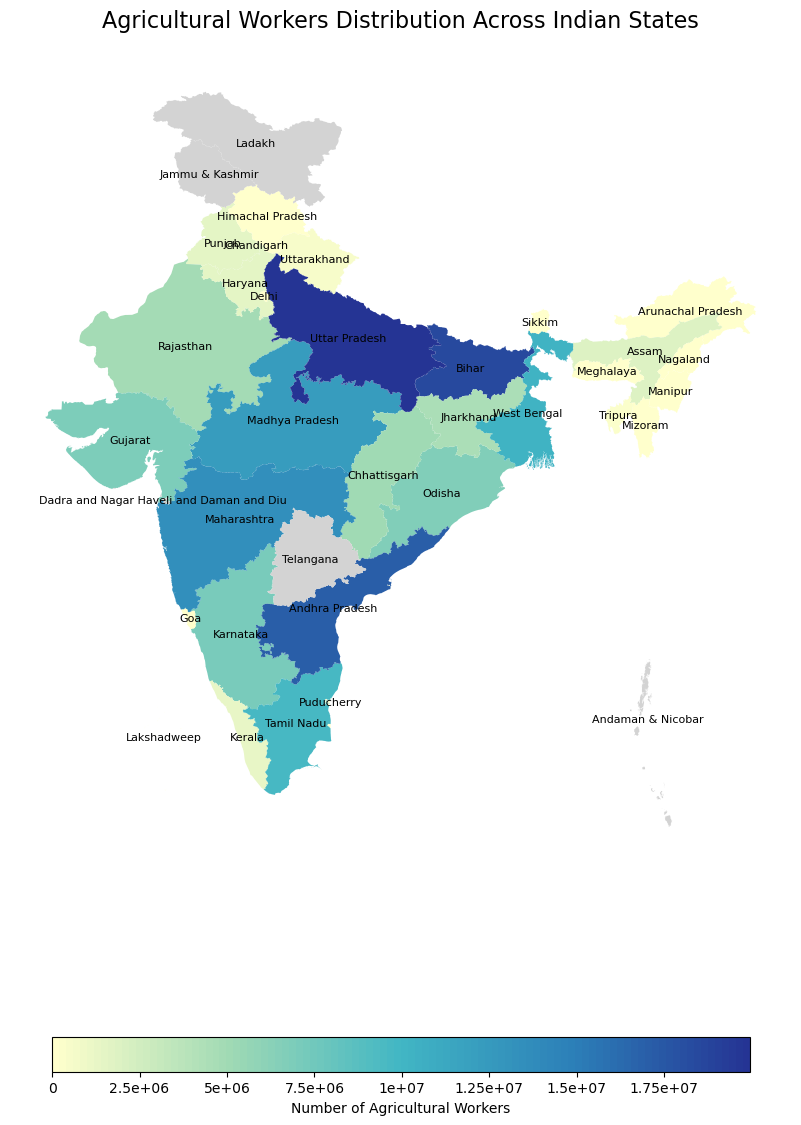

In [64]:
def create_agri_workers_map():
    """
    Create a visualization of India with states colored by number of agricultural workers
    """
    # Read the state-level shapefile
    states = gpd.read_file('Admin2.shp')
    
    # Create state name mapping dictionary
    state_name_mapping = {
        'NCT OF DELHI': 'Delhi',
        'ORISSA': 'Odisha',
        'PONDICHERRY': 'Puducherry'
    }
    
    # Create a new dictionary with corrected state names
    mapped_agri_data = {}
    for k, v in agri_data.items():
        new_key = state_name_mapping.get(k, k.title())
        mapped_agri_data[new_key] = v
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    
    # Create a custom colormap
    colors =   ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']  # Yellow to Blue
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)
    
    # Map state names to agricultural workers values
    states['Agri_Workers'] = states['ST_NM'].map(mapped_agri_data)
    
    # Plot the states
    states.plot(ax=ax, 
               column='Agri_Workers',
               cmap=cmap,
               legend=True,
               legend_kwds={'label': 'Number of Agricultural Workers',
                           'orientation': 'horizontal',
                           'shrink': 0.6,
                           'format': '%g'},
               missing_kwds={'color': 'lightgrey'})
    
    # Add state labels with worker count
    for idx, row in states.iterrows():
        if not np.isnan(row['Agri_Workers']):
            #label = f"{row['ST_NM']}\n({row['Agri_Workers']:,.0f})"
            label = f"{row['ST_NM']}"
        else:
            label = row['ST_NM']
            
        ax.annotate(text=label,
                   xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                   horizontalalignment='center',
                   verticalalignment='center',
                   fontsize=8)
    
    # Customize the plot
    ax.set_title('Agricultural Workers Distribution Across Indian States', fontsize=16, pad=20)
    ax.axis('off')
    
    return fig, ax

# Create and display the map
fig, ax = create_agri_workers_map()
plt.show()

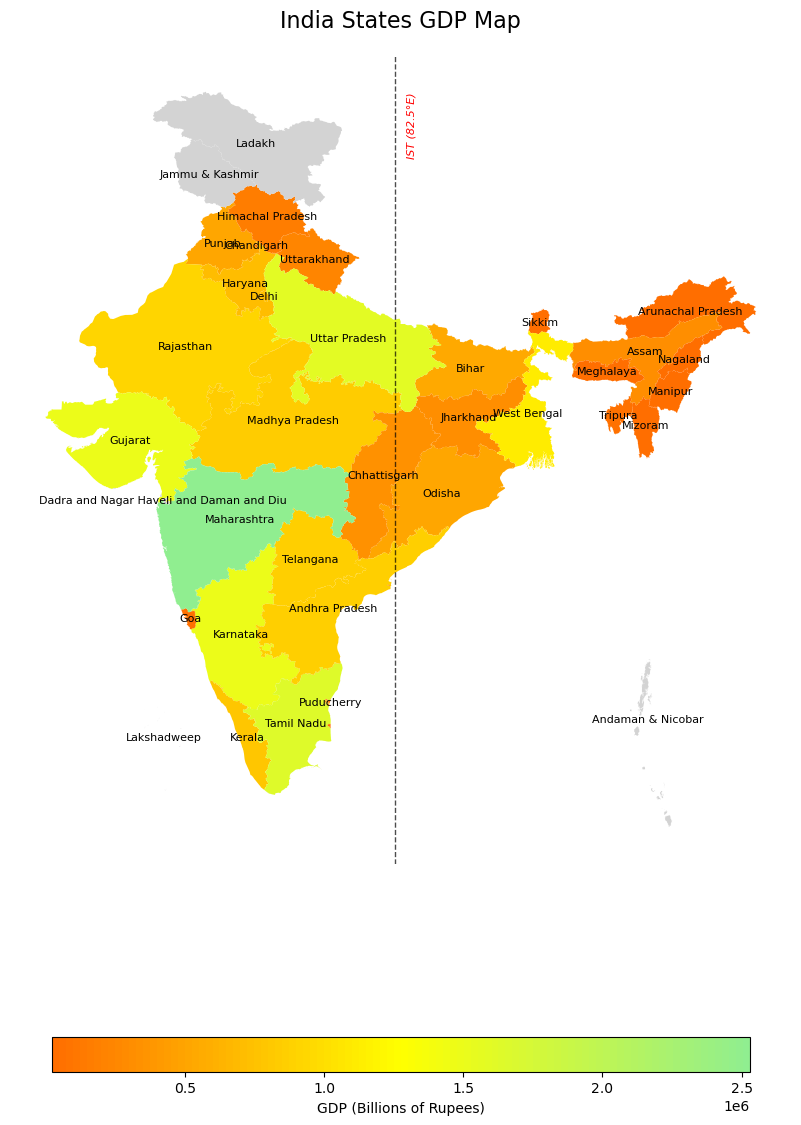

In [85]:
'''

gdp_data= {
     'Andhra Pradesh': 873721.0,
     'Arunachal Pradesh': 25335.0,
     'Assam': 309336.0,
     'Bihar': 527976.0,
     'Chhattisgarh': 327107.0,
     'Goa': 71853.0,
     'Gujarat': 1492156.0,
     'Haryana': 698940.0,
     'Himachal Pradesh': 148383.0,
     'Jammu and Kashmir': 159859.0,
     'Jharkhand': 305695.0,
     'Karnataka': 1479391.0,
     'Kerala': 788286.0,
     'Madhya Pradesh': 829805.0,
     'Maharashtra': 2528854.0,
     'Manipur': 27388.0,
     'Meghalaya': 32176.0,
     'Mizoram': 21912.0,
     'Nagaland': 26527.0,
     'Odisha': 498611.0,
     'Punjab': 512510.0,
     'Rajasthan': 911519.0,
     'Sikkim': 28402.0,
     'Tamil Nadu': 1630209.0,
     'Telangana': 857427.0,
     'Tripura': 49823.0,
     'Uttar Pradesh': 1582180.0,
     'Uttarakhand': 230314.0,
     'West Bengal': 1102054.0,
     'Andaman and Nicobar Islands': 9003.0,
     'Chandigarh': 40139.0,
     'Delhi': 738389.0,
     'Jammu and Kashmir UT': 0,
     'Puducherry': 36386.0
}
'''

def create_gdp_map_with_ist():
    """
    Create a visualization of India with states colored by GDP and IST line
    """
    # Read the state-level shapefile
    states = gpd.read_file('Admin2.shp')
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    
    # Create a custom colormap from red to green
    colors = ['#FF6E00', '#FFFF00', '#90EE90']
    cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)
    
    # Map state names to GDP values
    states['GDP'] = states['ST_NM'].map(gdp_data)
    
    # Plot the states
    states.plot(ax=ax, 
               column='GDP',
               cmap=cmap,
               legend=True,
               legend_kwds={'label': 'GDP (Billions of Rupees)',
                           'orientation': 'horizontal',
                           'shrink': 0.6},
               missing_kwds={'color': 'lightgrey'})
    
    # Add state labels
    for idx, row in states.iterrows():
        label = f"{row['ST_NM']}"
        ax.annotate(text=label,
                   xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                   horizontalalignment='center',
                   verticalalignment='center',
                   fontsize=8)
    
    # Get the bounds of the map
    bounds = states.total_bounds  # Returns (minx, miny, maxx, maxy)
    
    # Add IST line (82.5°E)
    ist_longitude = 82.5
    ist_line = ax.axvline(x=ist_longitude, color='black', linestyle='--', linewidth=1, alpha=0.7)
    
    # Add IST line label
    ax.text(ist_longitude + 0.5, bounds[3], 'IST (82.5°E)',
            rotation=90,
            verticalalignment='top',
            color='red',
            fontsize=8,
            style='italic'
           )
            
    
    # Customize the plot
    ax.set_title('India States GDP Map', fontsize=16, pad=20)
    ax.axis('off')
    
    return fig, ax

# Create and display the map with IST line
fig, ax = create_gdp_map_with_ist()
plt.show()